<a href="https://colab.research.google.com/github/wj198414/ASTRON1221/blob/main/DarkMatter/RotationCurveAddingMilkyWayComponents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import astropy.units as u
import astropy.constants as ac

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

Learn to how to define a function in Python

In [34]:
def calculate_orbital_velocity(M, R):
  """
  Calculate the orbital velocity
  Input: M - mass, R = orbital radius
  Output: v - orbital velocity
  """
  v = np.sqrt(ac.G * M / R)
  return(v)

In [7]:
M_bulge = 1e10 * u.solMass # Note the scientific notation here to define bulge mass

Learn to how to use an array

In [8]:
R_arr = np.arange(1, 30) * u.kpc # Define a range of orbital radius in kilo parsec
v_arr = calculate_orbital_velocity(M_bulge, R_arr)
print(v_arr.to(u.km/u.s)) # When in doubt, print them out!
#

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


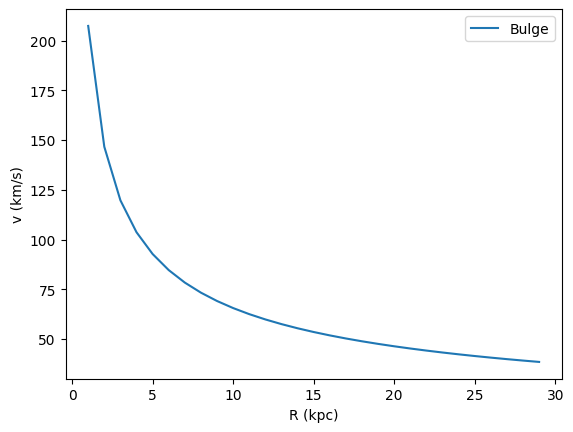

In [35]:
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
# The combination of labels and legend will come handy to show differnt curves in a plot as shown in future figures.
plt.show()
#

Now let's work on a case for the Milky Way disk. This is different from the Milky Way Bulge because Bulge is contained within 1 kpc, so can be considered as a point mass for the range of radius considered here (i.e., from 1 to 30 kpc). The disk component is different as it is extended to ~10 kpc, so the enclosed mass (for calculating the orbital velocity of a star) can be different for 1 kpc from 5 kpc. A star at a 1 kpc orbit can only feel the gravitational tug of the mass within 1 kpc. Similarly, a star at 5 kpc can only feel the gravitational tug of the mass within 5 kpc. The enclosed mass is different as can be shown below.

In [36]:
M_disk = 1e11 * u.solMass # Define disk total mass
R_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # here the density is in the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2))

318.3098861837907 1e+06 solMass / kpc2


In [38]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

Now I can show you that the enclosed mass for disk is different for 1kpc than for 5 kpc

In [39]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

999.0264638415543 1e+06 solMass at 1 kpc
24975.66159603886 1e+06 solMass at 5 kpc


In [27]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_bulge
    return(M_total)

In [40]:
# redefine v_bulge_arr to avoid confusion
v_bulge_arr = calculate_orbital_velocity(M_bulge, R_arr)


In [41]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_total = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculate_orbital_velocity(M_disk, R_arr)
v_bulge_disk_arr = calculate_orbital_velocity(M_total, R_arr)

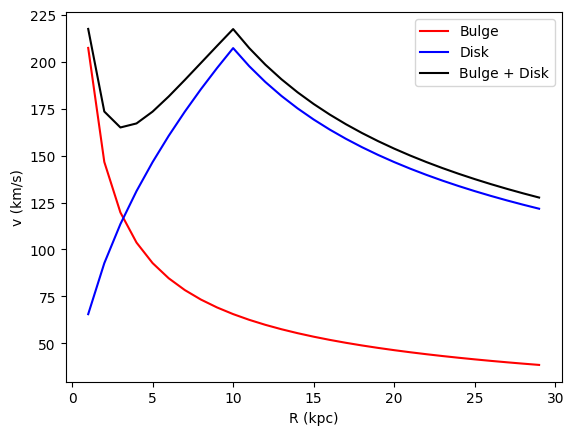

In [42]:
# Plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

Someone asked how do we know if we are close to an actual measurement? Here is a preview of what to come next week.

In [43]:
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [46]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")


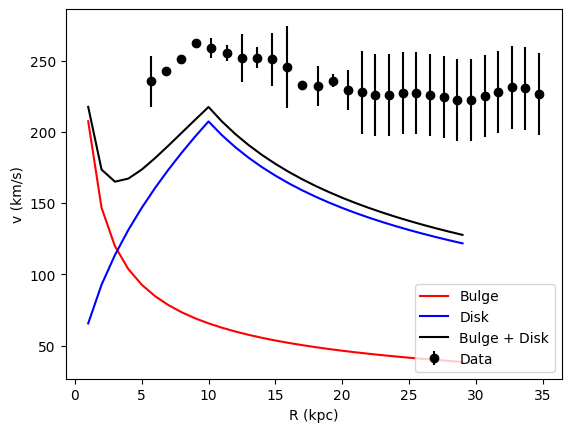

In [48]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

**Are we close, are we not?**